In [2]:
import osmnx as ox
import matplotlib.pyplot as plt

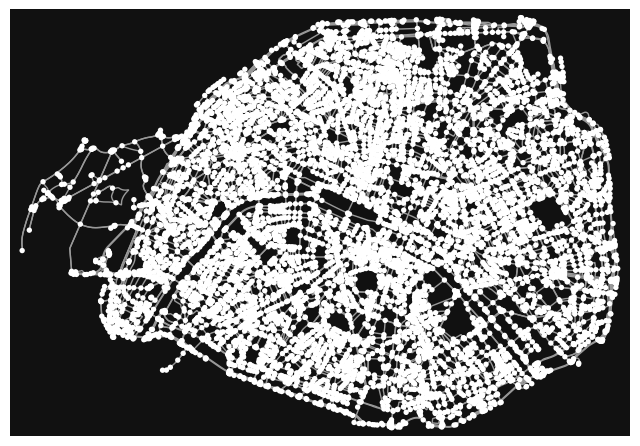

In [50]:
G = ox.graph_from_place('Paris, France', network_type='drive')
ox.plot_graph(G)
plt.show()

In [51]:
nodes, edges = ox.graph_to_gdfs(G)

nodes.head()

print(nodes[nodes['x'].isnull() | nodes['y'].isnull()])

Empty GeoDataFrame
Columns: [y, x, street_count, highway, junction, railway, ref, geometry]
Index: []


In [24]:
nodes = nodes.reset_index()
nodes.head()
type(nodes)
print(nodes[nodes['x'].isnull() | nodes['y'].isnull()])
nodes.head()


Empty GeoDataFrame
Columns: [osmid, y, x, street_count, highway, junction, railway, ref, geometry]
Index: []


,osmid,y,x,street_count,highway,junction,railway,ref,geometry
0,125730,48.863523,2.410732,4,NaN,NaN,NaN,NaN,POINT (2.41073 48.86352)
1,125742,48.851852,2.401373,4,NaN,NaN,NaN,NaN,POINT (2.40137 48.85185)
2,125743,48.854563,2.413409,3,NaN,NaN,NaN,NaN,POINT (2.41341 48.85456)
3,125745,48.854524,2.414352,3,NaN,NaN,NaN,NaN,POINT (2.41435 48.85452)
4,125747,48.854261,2.414664,3,NaN,NaN,NaN,NaN,POINT (2.41466 48.85426)


In [25]:
nodes = nodes.rename(columns={'y':'latitude', 'x':'longitude'})
nodes = nodes[['osmid', 'latitude', 'longitude','geometry','street_count']]


In [33]:
if not nodes['geometry'].is_valid.all():
    raise ValueError("Nodes contain invalid geometries.")

In [52]:
edges = edges.reset_index()
edges = edges.rename(columns={'u': 'from_node', 'v': 'to_node', 'name': 'street_name'})
edges = edges[['from_node', 'to_node', 'geometry', 'length', 'street_name']]

In [ ]:
edges.head()
edges.shape
duplicates = edges[edges.duplicated(subset=['from_node', 'to_node'], keep=False)]
print(duplicates)

         from_node      to_node  \
747         442252    305344287   
748         442252    305344287   
2920      25002675     25002663   
2921      25002675     25002663   
3277      25101533     25031493   
...            ...          ...   
17846  11324061305  11324061307   
17922  11560284466   3528321694   
17923  11560284466   3528321694   
18021  12179625841   4467439444   
18022  12179625841   4467439444   

                                                geometry      length  \
747    LINESTRING (2.27182 48.86688, 2.27167 48.86693...  474.428094   
748    LINESTRING (2.27182 48.86688, 2.27188 48.86695...  228.666534   
2920   LINESTRING (2.39051 48.84013, 2.39064 48.8401,...   91.453398   
2921   LINESTRING (2.39051 48.84013, 2.3903 48.83999,...  247.770879   
3277   LINESTRING (2.35013 48.84855, 2.35021 48.84858...   70.181831   
...                                                  ...         ...   
17846  LINESTRING (2.28677 48.88189, 2.28677 48.88187...    8.628152   
179

In [72]:
df = edges.drop_duplicates(subset=['from_node', 'to_node'], keep='first')
df

,from_node,to_node,geometry,length,street_name
0,125730,12179625841,"LINESTRING (2.41073 48.86352, 2.41072 48.86356)",4.347747,Rue Louis Lumière
1,125730,244455548,"LINESTRING (2.41073 48.86352, 2.41077 48.86337...",105.925708,Rue Louis Lumière
2,125730,567367734,"LINESTRING (2.41073 48.86352, 2.41083 48.86348...",35.154556,Rue Henri Duvernois
3,125730,1089076182,"LINESTRING (2.41073 48.86352, 2.41061 48.86351...",128.654542,Rue Louis Ganne
4,125742,60912980,"LINESTRING (2.40137 48.85185, 2.40133 48.85192...",129.018946,Rue de Buzenval
...,...,...,...,...,...
18156,12966545618,368133,"LINESTRING (2.34944 48.85727, 2.34925 48.85732)",14.907038,Avenue Victoria
18157,12966545618,644160,"LINESTRING (2.34944 48.85727, 2.34936 48.85725...",73.943445,Rue Saint-Martin
18158,12993954814,644159,"LINESTRING (2.36529 48.82895, 2.36517 48.82914)",22.895655,Rue Nationale
18159,12993954814,792985,"LINESTRING (2.36529 48.82895, 2.36539 48.82897...",164.922753,Rue du Château des Rentiers


In [36]:
hospitals = ox.features_from_place('Paris,France', tags={"amenity": "hospital"})


In [49]:
type(hospitals.crs)
point = hospitals.geometry.iloc[0]
point.x


2.3549103

In [30]:
hospitals= hospitals.reset_index()

In [31]:
hospitals.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 78 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   element                    75 non-null     object  
 1   id                         75 non-null     int64   
 2   geometry                   75 non-null     geometry
 3   addr:housenumber           15 non-null     object  
 4   addr:postcode              11 non-null     object  
 5   addr:street                15 non-null     object  
 6   amenity                    75 non-null     object  
 7   operator                   35 non-null     object  
 8   operator:wikidata          23 non-null     object  
 9   operator:wikipedia         6 non-null      object  
 10  source                     43 non-null     object  
 11  check_date                 9 non-null      object  
 12  fax                        18 non-null     object  
 13  healthcare                 74

In [32]:
hospitals['geometry'] = hospitals['geometry'].apply(lambda geom: geom if geom.geometryType == 'Point' else geom.centroid)
hospitals = hospitals.rename(columns={'id': 'hospital_id'})
hospitals = hospitals[['hospital_id', 'geometry']]
hospitals['geometry'] = hospitals['geometry'].apply(lambda geom: geom.wkt)

/tmp/ipykernel_8417/3446509321.py:4: UserWarning: Geometry column does not contain geometry.
  hospitals['geometry'] = hospitals['geometry'].apply(lambda geom: geom.wkt)


In [35]:
type(hospitals["geometry"].iloc[0])


str